In [1]:
import sys
import numpy as np
from astropy.io import fits
from astroscrappy import detect_cosmics
from matplotlib import pyplot as plt 
sys.path.append('aspired')

import twodspec
import standard

In [2]:
# Example data from SPRAT
# BLAP-14
sprat_data = fits.open('examples/v_e_20180704_32_1_0_2.fits')[1].data


aspired/twodspec.py:103: RuntimeWarning: invalid value encountered in log10
  np.log10(img),
aspired/twodspec.py:117: RuntimeWarning: invalid value encountered in greater
  ax1.set_xlim(min(ztot[ztot>0]),max(ztot))


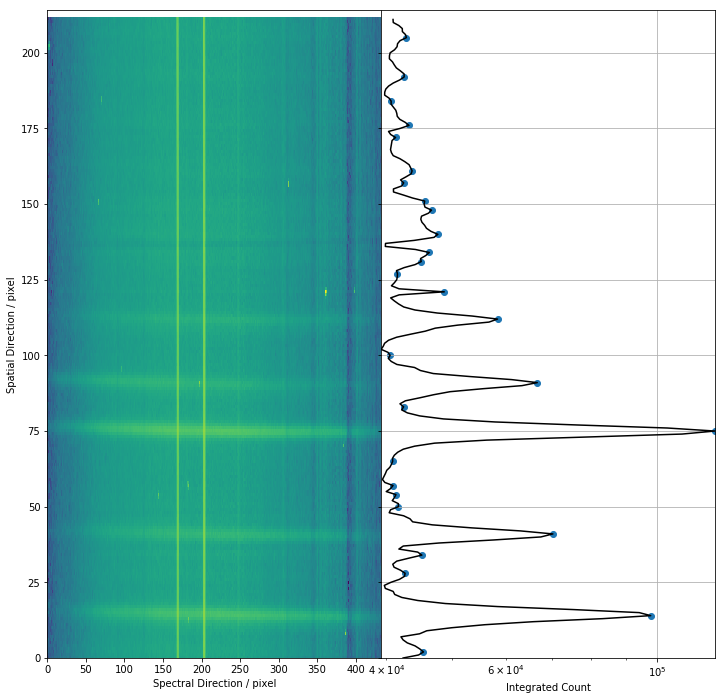

In [3]:
# (1) example of twodspec._find_peaks() without cosmic ray removal

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_data)[Waxis]
spatial_size = np.shape(sprat_data)[Saxis]

# the valid y-range of the chip (an array of int)
ydata = np.arange(spec_size)
ztot = np.sum(sprat_data, axis=Saxis)

peaks_y, heights_y = twodspec._find_peaks(sprat_data, spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


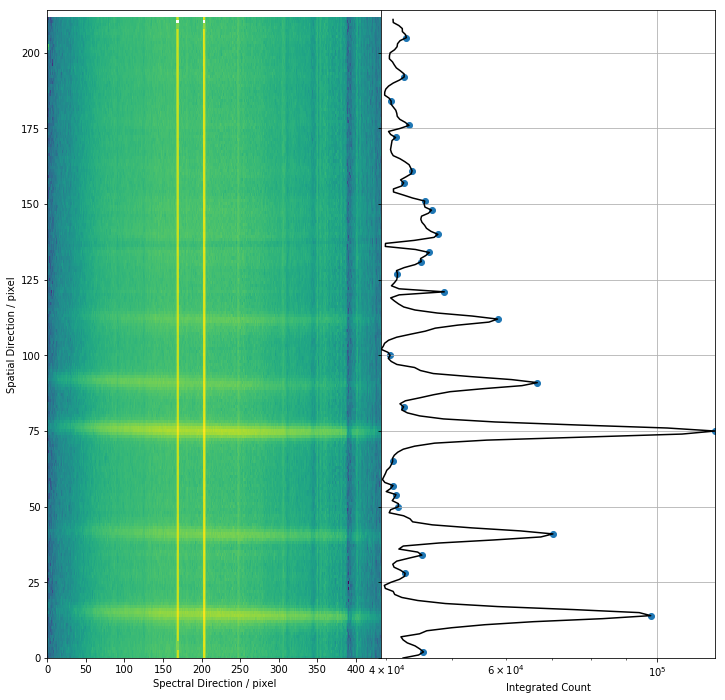

In [4]:
# (2) example of twodspec._find_peaks() with cosmic ray removal
peaks_y, heights_y = twodspec._find_peaks(detect_cosmics(sprat_data)[1], spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

Tracing Aperture using nsteps=20
Spectrum 1 : Trace gaussian width = [1.78284606 1.67048133 1.60749428 1.68166841 1.64218446 1.62407942
 1.58878315 1.56911081 1.5553088  1.46448437 1.41723699 1.46251853
 1.50520892 1.47598036 1.50184782 1.48147893 1.42093142 1.48051653
 1.47555694 0.        ] pixels


aspired/twodspec.py:312: RuntimeWarning: invalid value encountered in greater_equal
  img = detect_cosmics(img)
aspired/twodspec.py:312: RuntimeWarning: invalid value encountered in greater
  img = detect_cosmics(img)
aspired/twodspec.py:312: RuntimeWarning: invalid value encountered in less
  img = detect_cosmics(img)
aspired/twodspec.py:331: RuntimeWarning: invalid value encountered in log10
  np.log10(img),
aspired/twodspec.py:343: RuntimeWarning: invalid value encountered in greater
  ax1.set_xlim(min(ztot[ztot>0]),max(ztot))


Spectrum 2 : Trace gaussian width = [2.1725553  1.88417835 1.8305153  1.79455955 1.79925899 1.75879543
 1.75338654 1.79290126 1.73199933 1.66715957 1.64417085 1.69039492
 1.65528432 1.67591138 1.68876172 1.6642775  1.55368622 1.60765402
 1.65141253 0.        ] pixels
Spectrum 3 : Trace gaussian width = [1.5632258  1.55969551 1.75199362 1.79547002 1.82371503 1.69833424
 1.69981197 1.66665048 1.53955842 1.53475857 1.46932095 1.48850695
 1.42941369 1.4273116  1.46296977 1.40338764 1.41118871 1.41221657
 1.81370042 0.        ] pixels
Spectrum 4 : Trace gaussian width = [1.64432851 1.73617888 1.6823868  1.65558581 1.70442345 1.77365862
 1.89112234 1.88059196 1.94190397 1.85442885 1.79529376 1.71535907
 1.8130955  1.76203507 1.81938908 1.66661765 1.75607407 1.36403885
 2.38093152 0.        ] pixels
Spectrum 5 : Trace gaussian width = [1.88861997 2.79914563 1.91092587 2.04316486 1.86573555 2.01259886
 1.8466752  1.80152421 1.72166821 1.70709819 1.7007916  1.75570062
 1.69605582 1.87151195 1.9

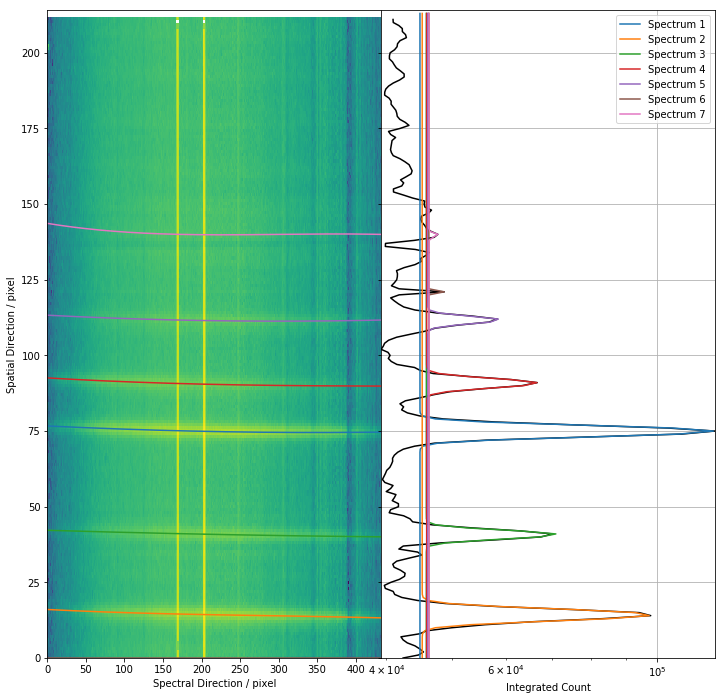

In [5]:
# (3) example of twodspec.ap_trace() with cosmic ray removal, selecting the 7 brightest spectra
#     in the pixel range covered by spatial_mask and spec_mask.
#     The 6th and 7th ones failed, error messages are printed but the code continues to run.


spec_mask = np.zeros(spec_size)
#spec_mask[40:250] += 1
spec_mask += 1
spec_mask = (spec_mask == 1)

spatial_mask = np.zeros(spatial_size)
#spatial_mask[100:1000] += 1
spatial_mask += 1
spatial_mask = (spatial_mask == 1)

my, my_sigma = twodspec.ap_trace(sprat_data, nsteps=20, spatial_mask=spatial_mask, spec_mask=spec_mask,
                                cosmic=True, n_spec=7, recenter=False, prevtrace=(0, ), 
                                fittype='spline', bigbox=8, Saxis=1,
                                silence=False, display=True)

aspired/twodspec.py:577: RuntimeWarning: invalid value encountered in greater_equal
  img = detect_cosmics(img)
aspired/twodspec.py:577: RuntimeWarning: invalid value encountered in greater
  img = detect_cosmics(img)
aspired/twodspec.py:577: RuntimeWarning: invalid value encountered in less
  img = detect_cosmics(img)


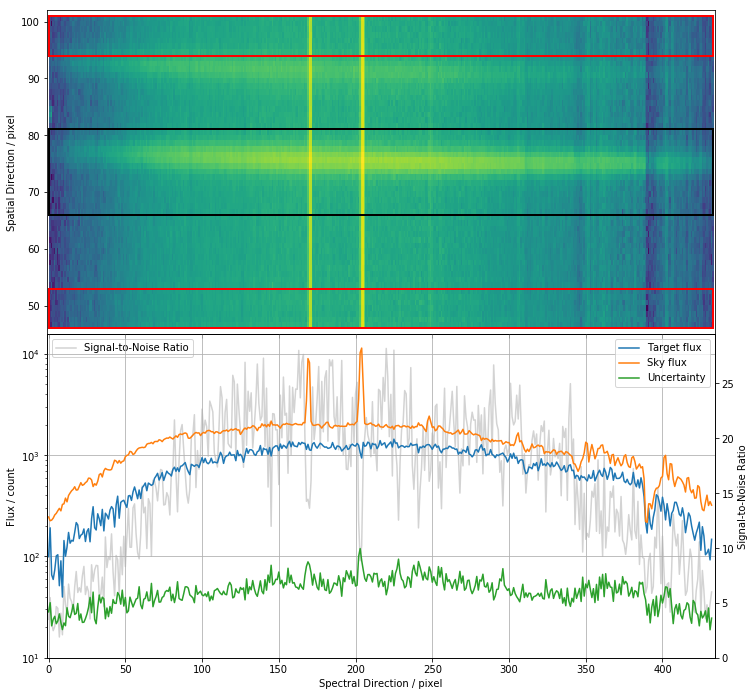

In [6]:
# (4a) (Aperature) Extracting spectrum by summing over the aperture along the trace
# my[0] is a special cases where skysep has to be increased to avoid crowding
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[0],
    trace_sigma = my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=13,
    display=True,
    optimal=False)

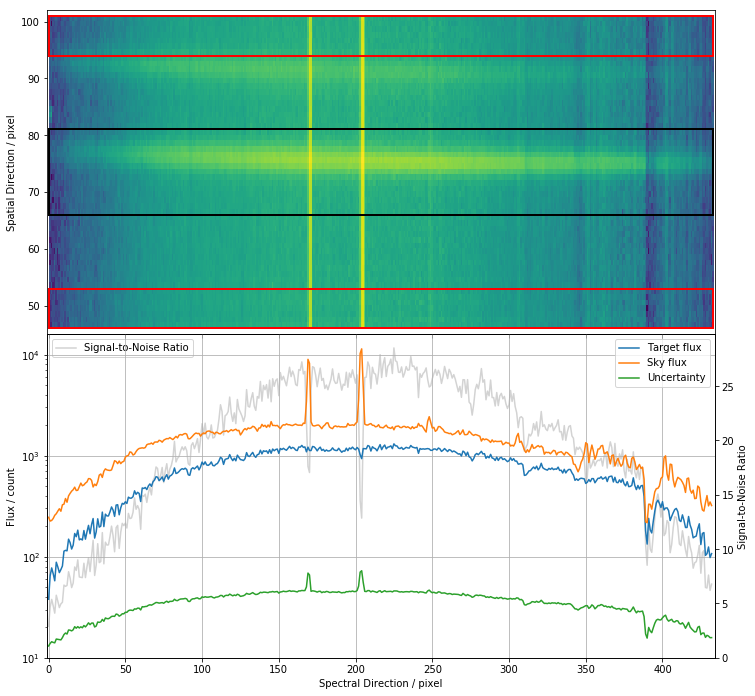

In [7]:
# (4b) (Optimal) Extracting spectrum by summing over the aperture along the trace
# my[0] is a special cases where skysep has to be increased to avoid crowding
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[0],
    trace_sigma = my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=13,
    display=True)

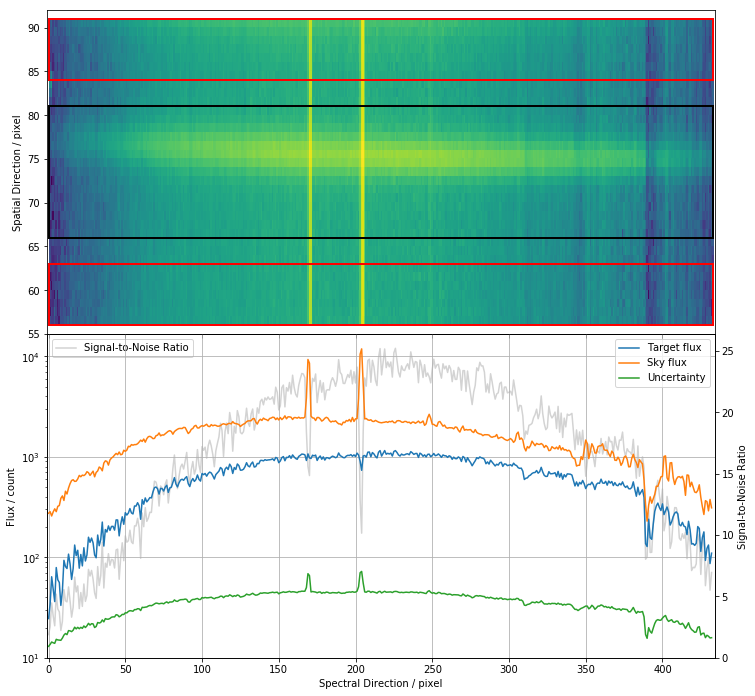

In [8]:
# Optimal my[0] with sky fit with 1st order polynomial
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[0],
    trace_sigma = my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skydeg=1,
    display=True)

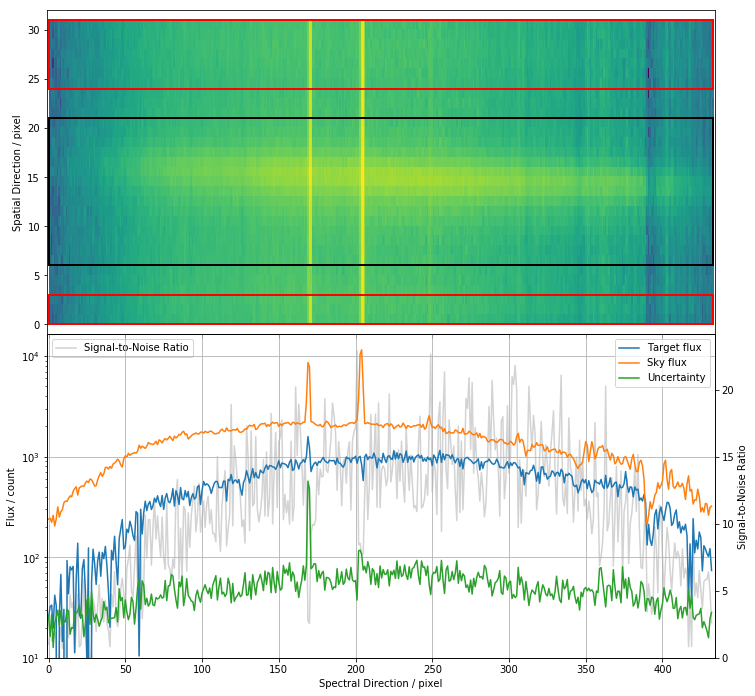

In [9]:
# my[1] is a special case where the spectrum (sky part) is close to the edge
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[1],
    trace_sigma = my_sigma[1],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True,
    optimal=False)

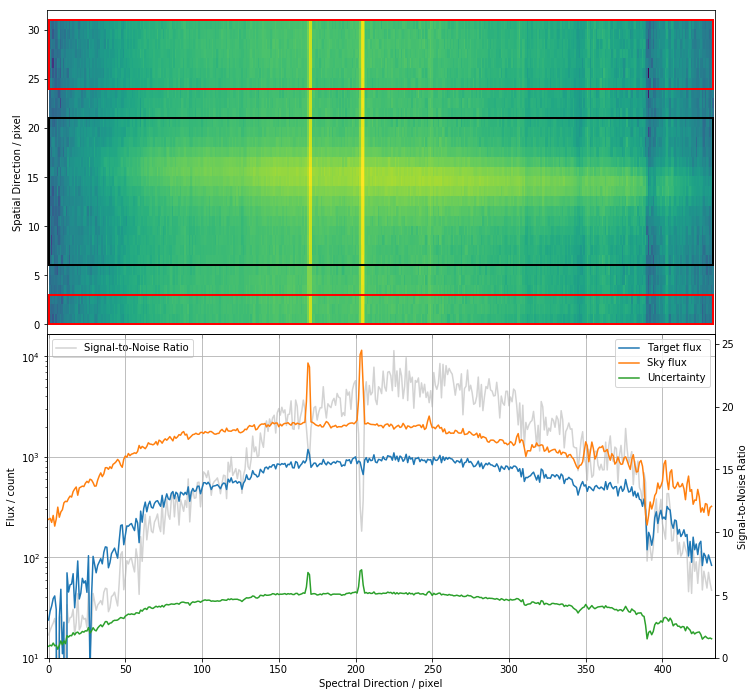

In [10]:
# Optimal my[1]
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[1],
    trace_sigma = my_sigma[1],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True)

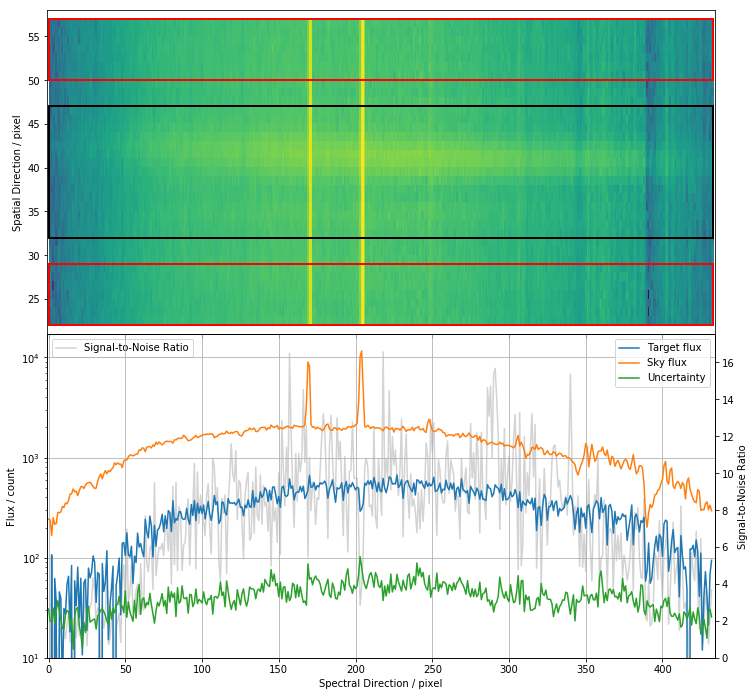

In [11]:
# my[2] is a typical case
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[2],
    trace_sigma = my_sigma[2],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True,
    optimal=False)

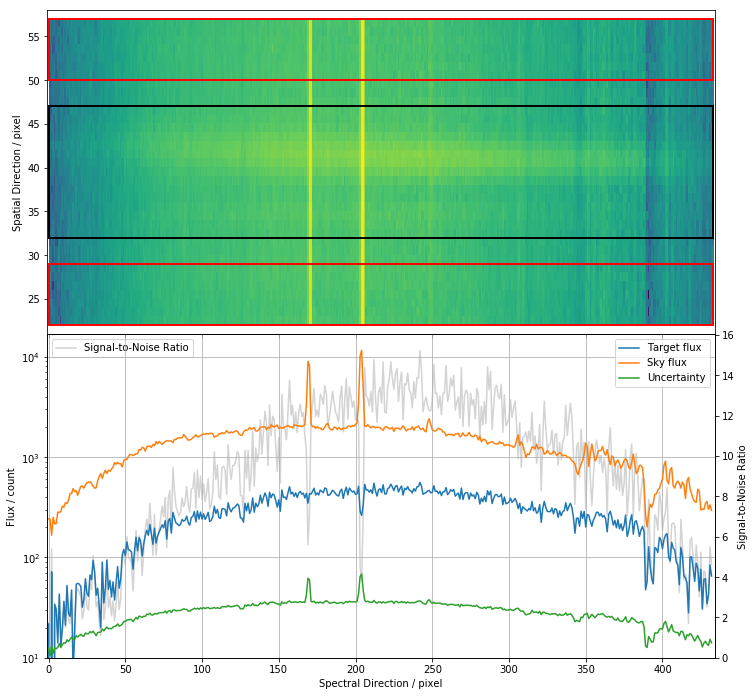

In [12]:
# Optimal my[2]
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[2],
    trace_sigma = my_sigma[2],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True)

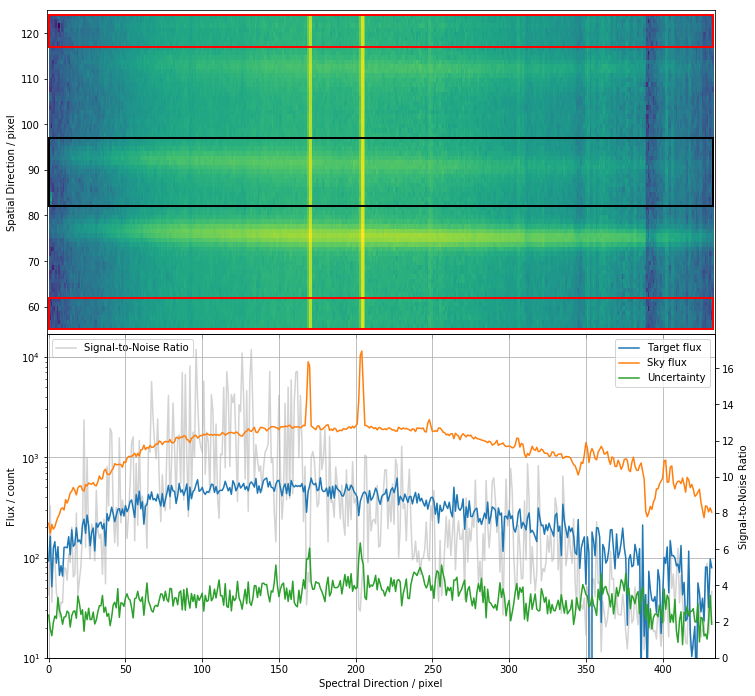

In [13]:
# my[3] is a special cases where skysep has to be increased to avoid crowding
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[3],
    trace_sigma = my_sigma[3],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=20,
    display=True,
    optimal=False)

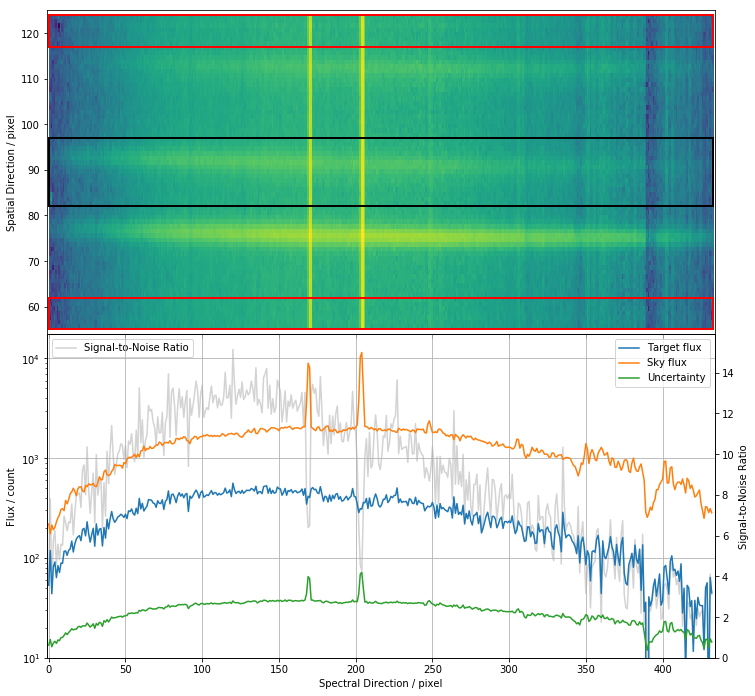

In [14]:
# Optimal my[3]
spec0, sky0, err0 = twodspec.ap_extract(
    sprat_data,
    my[3],
    trace_sigma = my_sigma[3],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=20,
    display=True)

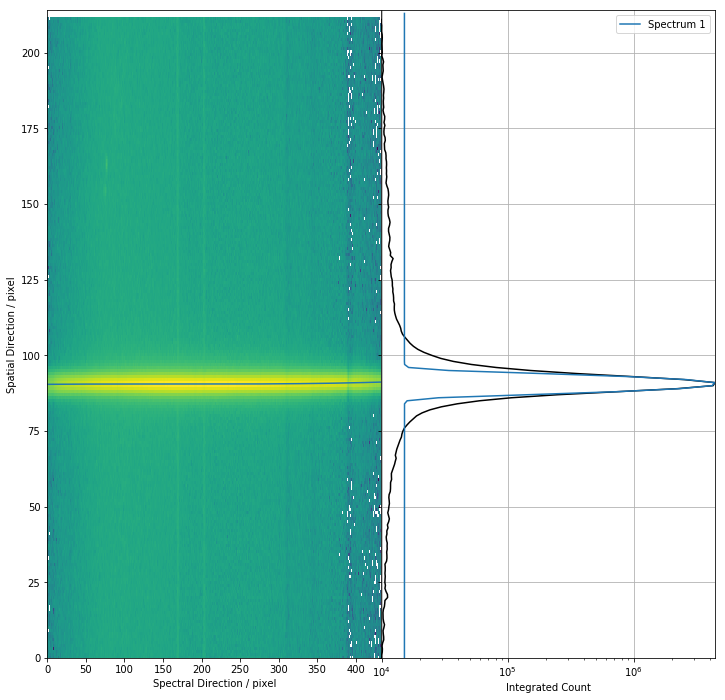

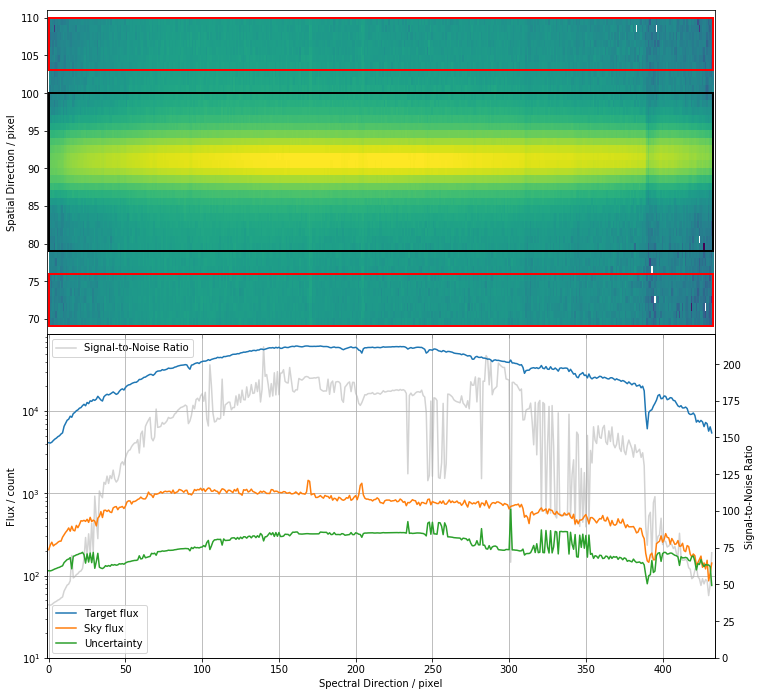

In [27]:
# Example data from SPRAT
# Hiltner102
sprat_standard_data = fits.open('examples/v_s_20180703_65_1_0_2.fits')[1].data

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_standard_data)[Waxis]
spatial_size = np.shape(sprat_standard_data)[Saxis]

spec_mask = np.zeros(spec_size)
#spec_mask[40:250] += 1
spec_mask += 1
spec_mask = (spec_mask == 1)

spatial_mask = np.zeros(spatial_size)
#spatial_mask[100:1000] += 1
spatial_mask += 1
spatial_mask = (spatial_mask == 1)

my, my_sigma = twodspec.ap_trace(
    sprat_standard_data, nsteps=20, Saxis=1, spatial_mask=spatial_mask,
    spec_mask=spec_mask, cosmic=True, n_spec=1, recenter=False, prevtrace=(0, ), 
    fittype='spline', bigbox=8, silence=True, display=True
)

spec, sky, err = twodspec.ap_extract(
    sprat_standard_data,
    my[0],
    apwidth=10,
    trace_sigma = my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True)

In [22]:
# Wavelength Calibration placeholder
wave = np.arange(len(spec))*4.45+4000.
wave = np.arange(4020.,8000.,9.2)

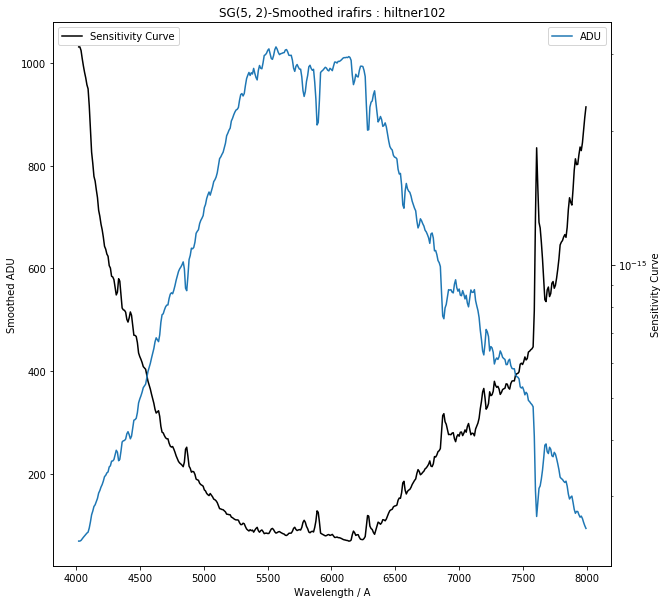

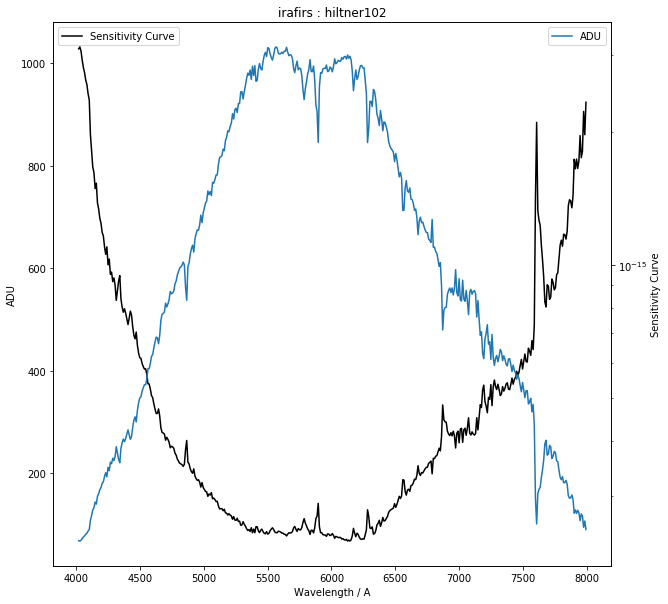

In [28]:
# Get standard
sencurve = standard.get_sencurve(wave, spec, 'hiltner102' ,'irafirs', exp_time=60., cutoff=0.4, smooth=True, slength=5, sorder=2, display=True)
sencurve_not_smoothed = standard.get_sencurve(wave, spec, 'hiltner102' ,'irafirs', exp_time=60., cutoff=0.4, smooth=False, display=True)

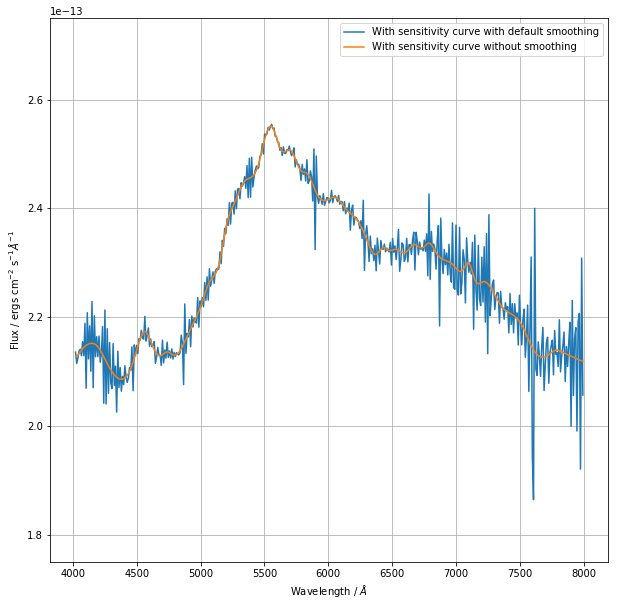

In [24]:
plt.figure(figsize=(10,10))
plt.plot(wave, spec * sencurve(wave) / 60., label='With sensitivity curve with default smoothing')
plt.plot(wave, spec * sencurve_not_smoothed(wave) / 60., label='With sensitivity curve without smoothing')
plt.xlabel(r'Wavelength / $\AA$')
plt.ylabel(r'Flux / ergs cm$^{-2}$ s$^{-1} \AA^{-1}$')
plt.ylim(1.75e-13, 2.75e-13)
plt.grid()
plt.legend()

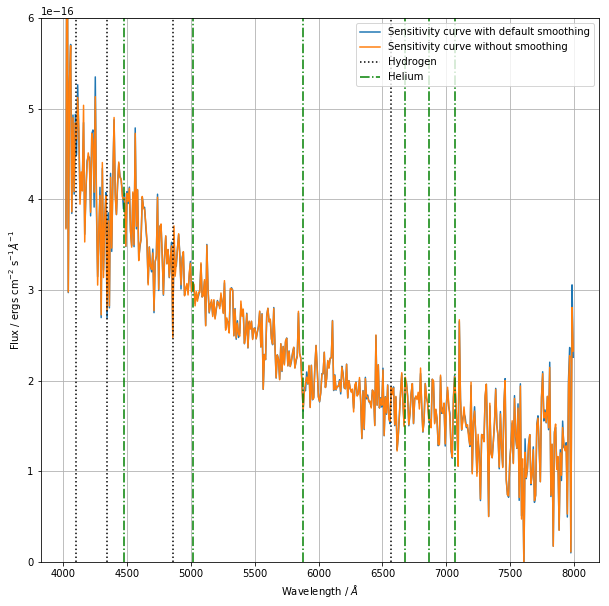

In [25]:
# Flux calibrated BLAP-09
plt.figure(figsize=(10,10))
plt.plot(wave, spec0 * sencurve(wave) / 450., label='Sensitivity curve with default smoothing')
plt.plot(wave, spec0 * sencurve_not_smoothed(wave) / 450., label='Sensitivity curve without smoothing')

# Hydrogen
Ha = 6563.
Hb = 4861.
Hc = 4340.
Hd = 4102

# Helium
He1 = 4471
He2 = 5015
He3 = 5875
He4 = 6678
He5 = 6867
He6 = 7065

plt.plot([Ha,Ha],[0,1e-15], ls=':', color='black', label='Hydrogen')
plt.plot([Hb,Hb],[0,1e-15], ls=':', color='black')
plt.plot([Hc,Hc],[0,1e-15], ls=':', color='black')
plt.plot([Hd,Hd],[0,1e-15], ls=':', color='black')

plt.plot([He1,He1],[0,1e-15], ls='-.', color='green', label='Helium')
plt.plot([He2,He2],[0,1e-15], ls='-.', color='green')
plt.plot([He3,He3],[0,1e-15], ls='-.', color='green')
plt.plot([He4,He4],[0,1e-15], ls='-.', color='green')
plt.plot([He5,He5],[0,1e-15], ls='-.', color='green')
plt.plot([He6,He6],[0,1e-15], ls='-.', color='green')

plt.xlabel(r'Wavelength / $\AA$')
plt.ylabel(r'Flux / ergs cm$^{-2}$ s$^{-1} \AA^{-1}$')
plt.ylim(0, 6e-16)
plt.grid()
plt.legend()


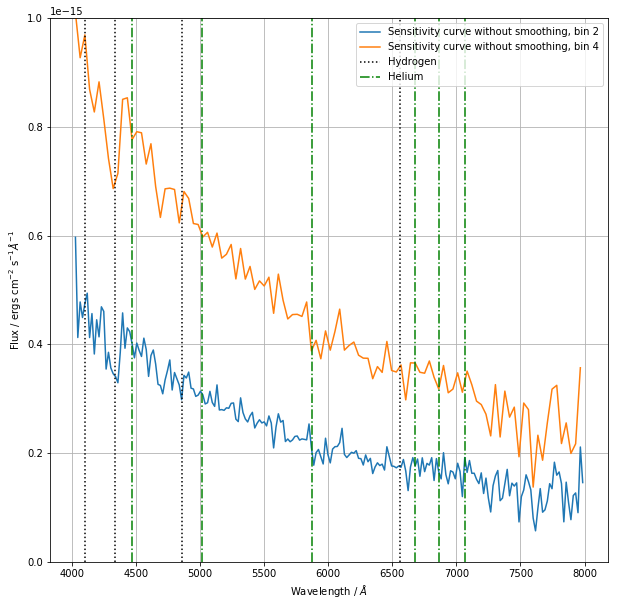

In [26]:

bin1 = (spec0 * sencurve_not_smoothed(wave) / 450.)
bin2 = (bin1[:-1:2] + bin1[1::2]) / 2.
bin4 = (bin2[::2] + bin2[1::2])

plt.figure(figsize=(10,10))
plt.plot(wave[1::2], bin2, label='Sensitivity curve without smoothing, bin 2')
plt.plot(wave[1::4], bin4, label='Sensitivity curve without smoothing, bin 4')


plt.plot([Ha,Ha],[0,1e-15], ls=':', color='black', label='Hydrogen')
plt.plot([Hb,Hb],[0,1e-15], ls=':', color='black')
plt.plot([Hc,Hc],[0,1e-15], ls=':', color='black')
plt.plot([Hd,Hd],[0,1e-15], ls=':', color='black')

plt.plot([He1,He1],[0,1e-15], ls='-.', color='green', label='Helium')
plt.plot([He2,He2],[0,1e-15], ls='-.', color='green')
plt.plot([He3,He3],[0,1e-15], ls='-.', color='green')
plt.plot([He4,He4],[0,1e-15], ls='-.', color='green')
plt.plot([He5,He5],[0,1e-15], ls='-.', color='green')
plt.plot([He6,He6],[0,1e-15], ls='-.', color='green')

plt.xlabel(r'Wavelength / $\AA$')
plt.ylabel(r'Flux / ergs cm$^{-2}$ s$^{-1} \AA^{-1}$')
plt.ylim(0, 1e-15)
plt.grid()
plt.legend()